In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [15]:
df= pd.read_csv("Datasets/train.csv", usecols=['Age', 'Fare','Survived'])

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [17]:
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [18]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size =0.2, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQ plot')

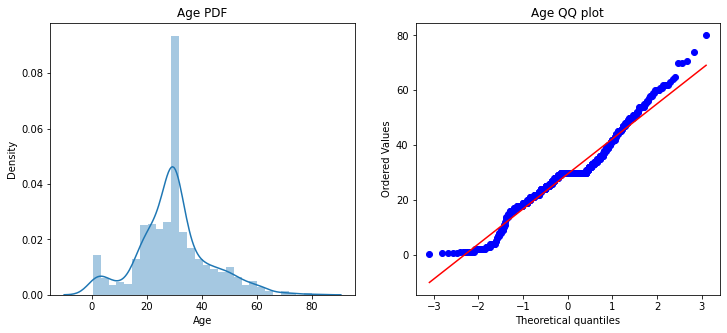

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm', plot=plt)
plt.title('Age QQ plot')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQ plot')

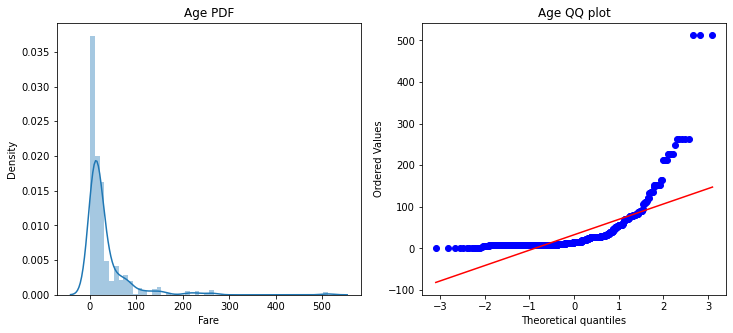

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm', plot=plt)
plt.title('Age QQ plot')

In [31]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

In [37]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred= clf.predict(X_test)
y_pred2= clf2.predict(X_test)

accuracy_score(y_test, y_pred)

0.6480446927374302

In [38]:
accuracy_score(y_test, y_pred2)

0.6815642458100558

In [62]:
trf = FunctionTransformer(np.log1p)

In [63]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [64]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

In [65]:
clf.fit(X_train_transformed ,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred= clf.predict(X_test_transformed)
y_pred2= clf2.predict(X_test_transformed)

print('Accuracy of LR: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of LR: 0.6815642458100558


In [66]:
accuracy_score(y_test,y_pred2)

0.6983240223463687

In [51]:
X_transformed = trf.fit_transform(X)

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6610736579275904


Text(0.5, 1.0, 'Fare After log')

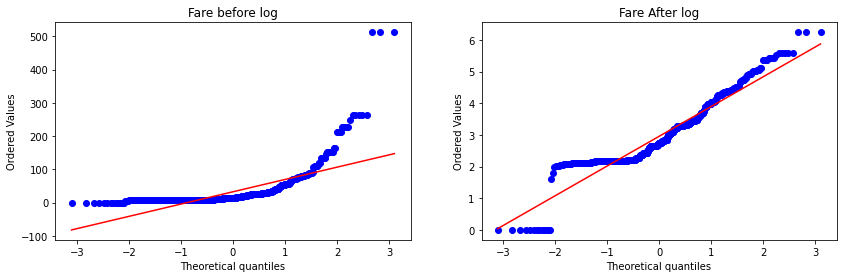

In [52]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot= plt)
plt.title("Fare before log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot= plt)
plt.title("Fare After log")


In [53]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare']),    
],remainder ='passthrough')

In [67]:
X_train2 = trf2.fit_transform(X_train)
X_test2 = trf2.transform(X_test)

In [70]:
clf.fit(X_train2, y_train)


LogisticRegression()

In [72]:
y_pred = clf.predict(X_test_transformed2)


In [73]:
accuracy_score(y_test, y_pred)

0.6703910614525139

In [61]:
accuracy_score(y_pred1, y_test)

0.31843575418994413